## Week 2 Capstone Work

For Week 2, include concepts such as linear regression with lasso, ridge, and elastic net regression.

In [2]:
# Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Read in previous data
team = pd.read_csv('data/cleaned/teamstats_eng.csv', sep=',', header=0)
wr = pd.read_csv('data/cleaned/wr_eng.csv', sep=',', header=0)

# create RKF
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

In [4]:
team.columns, wr.columns

(Index(['year', 'team', 'wins', 'losses', 'win_loss_perc', 'points',
        'points_opp', 'points_diff', 'total_yards', 'plays_offense',
        'yds_per_play_offense', 'turnovers', 'fumbles_lost', 'first_down',
        'pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int',
        'pass_net_yds_per_att', 'pass_fd', 'rush_att', 'rush_yds', 'rush_td',
        'rush_yds_per_att', 'rush_fd', 'penalties', 'penalties_yds', 'pen_fd',
        'score_pct', 'turnover_pct', 'exp_pts_tot', 'injuries',
        'fumbles_lost_sq', 'penalties_sq', 'total_yards_sq'],
       dtype='object'),
 Index(['Length', 'Distance', 'DirChanges', 'Max_S', 'Max_A', 'Injury_Duration',
        'Temperature', 'Precipitation', 'FieldType_Natural',
        'PlayType_Extra Point', 'PlayType_Field Goal', 'PlayType_Kickoff',
        'PlayType_Kickoff Not Returned', 'PlayType_Kickoff Returned',
        'PlayType_Pass', 'PlayType_Punt', 'PlayType_Punt Not Returned',
        'PlayType_Punt Returned', 'PlayType_Rush', 'Le

In [5]:
# Team stats to predict inj
X_team = team.drop(columns=['year', 'team', 'wins', 'losses', 'injuries']).copy()
y_team = team['injuries'].copy()
scores_team = []

# Team stats to predict win_loss_perc
X_team2 = team.drop(columns=['year', 'team', 'wins', 'losses', 'win_loss_perc']).copy()
y_team2 = team['win_loss_perc'].copy()
scores_team2 = []

# wr play by play stats to predict injury duration
X_wr = wr.drop(columns=['Injury_Duration']).copy()
y_wr = wr['Injury_Duration'].copy()
scores_wr = []

### Lasso Regression

In [6]:
# Team stats to predict inj w lasso

lasso_team = Lasso(alpha=1.0)
lasso_scores_team = cross_val_score(estimator=lasso_team, X=X_team, y=y_team, scoring='neg_mean_squared_error', cv=rkf)
print(f'RMSE: {np.sqrt(-lasso_scores_team.mean())}')
scores_team.append(np.sqrt(-lasso_scores_team.mean()))

# pretty bad error in this trial... Mean Error: 19.277519945474 which is about the standard deviation of injuries by team by season
y_team.mean(), y_team.std()

c:\Users\mgurg\Desktop\BU OMCDS\Semester-3\datascience\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.463e+02, tolerance: 1.017e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\mgurg\Desktop\BU OMCDS\Semester-3\datascience\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.570e+01, tolerance: 9.992e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\mgurg\Desktop\BU OMCDS\Semester-3\datascience\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

RMSE: 19.277519945474


c:\Users\mgurg\Desktop\BU OMCDS\Semester-3\datascience\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.846e+03, tolerance: 9.867e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\mgurg\Desktop\BU OMCDS\Semester-3\datascience\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.525e+03, tolerance: 1.046e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\mgurg\Desktop\BU OMCDS\Semester-3\datascience\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

(np.float64(61.57378223495702), np.float64(18.781116908220827))

In [7]:
# Team stats to predict win_loss_perc with lasso (inj as a feature)
lasso_team2 = Lasso(alpha=1.0)
lasso_scores_team2 = cross_val_score(estimator=lasso_team2, X=X_team2, y=y_team2, scoring='neg_mean_squared_error', cv=rkf)
print(f'RMSE: {np.sqrt(-lasso_scores_team2.mean())}')
scores_team2.append(np.sqrt(-lasso_scores_team2.mean()))

y_team2.mean(), y_team2.std()

RMSE: 0.08225822492277364


(np.float64(0.5063553008595988), np.float64(0.18927236610492845))

In [8]:
# wr play by play to predict injury duration with lasso
lasso_wr = Lasso(alpha=1.0)
lasso_scores_wr = cross_val_score(estimator=lasso_wr, X=X_wr, y=y_wr, scoring='neg_mean_squared_error', cv=rkf)
print(f'RMSE: {np.sqrt(-lasso_scores_wr.mean())}')
scores_wr.append(np.sqrt(-lasso_scores_wr.mean()))

y_wr.mean(), y_wr.std()

RMSE: 4.6972056150235675


(np.float64(0.6937142857142857), np.float64(4.79569235090927))

For Lasso, the team stats to injury prediction was not effective. Team stats (incl injuries) to win percentage was effective, but I suspect that it excluded injuries. WR stats were within one standard deviation of injury prediction, though I think logistic regression on boolean injury is well suited to this.

### Ridge Regression

In [9]:
# Team stats to predict inj w Ridge

ridge_team = Ridge(alpha=5.0)
ridge_scores_team = cross_val_score(estimator=ridge_team, X=X_team, y=y_team, scoring='neg_mean_squared_error', cv=rkf)
print(f'RMSE: {np.sqrt(-ridge_scores_team.mean())}')
scores_team.append(np.sqrt(-ridge_scores_team.mean()))

y_team.mean(), y_team.std()

RMSE: 19.42223157485481


(np.float64(61.57378223495702), np.float64(18.781116908220827))

In [10]:
# Team stats to predict win_loss_perc w Ridge

ridge_team2 = Ridge(alpha=5.0)
ridge_scores_team2 = cross_val_score(estimator=ridge_team2, X=X_team2, y=y_team2, scoring='neg_mean_squared_error', cv=rkf)
print(f'RMSE: {np.sqrt(-ridge_scores_team2.mean())}')
scores_team2.append(np.sqrt(-ridge_scores_team2.mean()))

y_team2.mean(), y_team2.std()

RMSE: 0.08378747936797754


(np.float64(0.5063553008595988), np.float64(0.18927236610492845))

In [11]:
# wr play by play to predict injury duration with ridge (inj as a feature)
ridge_wr = Ridge(alpha=1)
ridge_scores_wr = cross_val_score(estimator=ridge_wr, X=X_wr, y=y_wr, scoring='neg_mean_squared_error', cv=rkf)
print(f'RMSE: {np.sqrt(-ridge_scores_wr.mean())}')
scores_wr.append(np.sqrt(-ridge_scores_wr.mean()))

y_wr.mean(), y_wr.std()

RMSE: 3.934330273171552


(np.float64(0.6937142857142857), np.float64(4.79569235090927))

Ridge was slightly worse error wise for the two Team based models, but was slightly better for the WR play by play. 

### Elastic Net Regression

In [12]:
# Team stats to predict inj w enet

enet_team = ElasticNet(alpha=70.0)
enet_scores_team = cross_val_score(estimator=enet_team, X=X_team, y=y_team, scoring='neg_mean_squared_error', cv=rkf)
print(f'RMSE: {np.sqrt(-enet_scores_team.mean())}')
scores_team.append(np.sqrt(-enet_scores_team.mean()))

y_team.mean(), y_team.std()

RMSE: 18.771746196567424


(np.float64(61.57378223495702), np.float64(18.781116908220827))

In [13]:
# Team stats to predict win_loss_perc w enet

enet_team2 = ElasticNet(alpha=1)
enet_scores_team2 = cross_val_score(estimator=enet_team2, X=X_team2, y=y_team2, scoring='neg_mean_squared_error', cv=rkf)
print(f'RMSE: {np.sqrt(-enet_scores_team2.mean())}')
scores_team2.append(np.sqrt(-enet_scores_team2.mean()))

y_team2.mean(), y_team2.std()

RMSE: 0.08161886218000731


(np.float64(0.5063553008595988), np.float64(0.18927236610492845))

In [14]:
# wr play by play to predict injury duration with enet
enet_wr = ElasticNet(alpha=1)
enet_scores_wr = cross_val_score(estimator=enet_wr, X=X_wr, y=y_wr, scoring='neg_mean_squared_error', cv=rkf)
print(f'RMSE: {np.sqrt(-enet_scores_wr.mean())}')
scores_wr.append(np.sqrt(-enet_scores_wr.mean()))

y_wr.mean(), y_wr.std()

RMSE: 4.694958295712256


(np.float64(0.6937142857142857), np.float64(4.79569235090927))

Slightly better for the team predictions, worse for the wr play by play

### Graphing Results

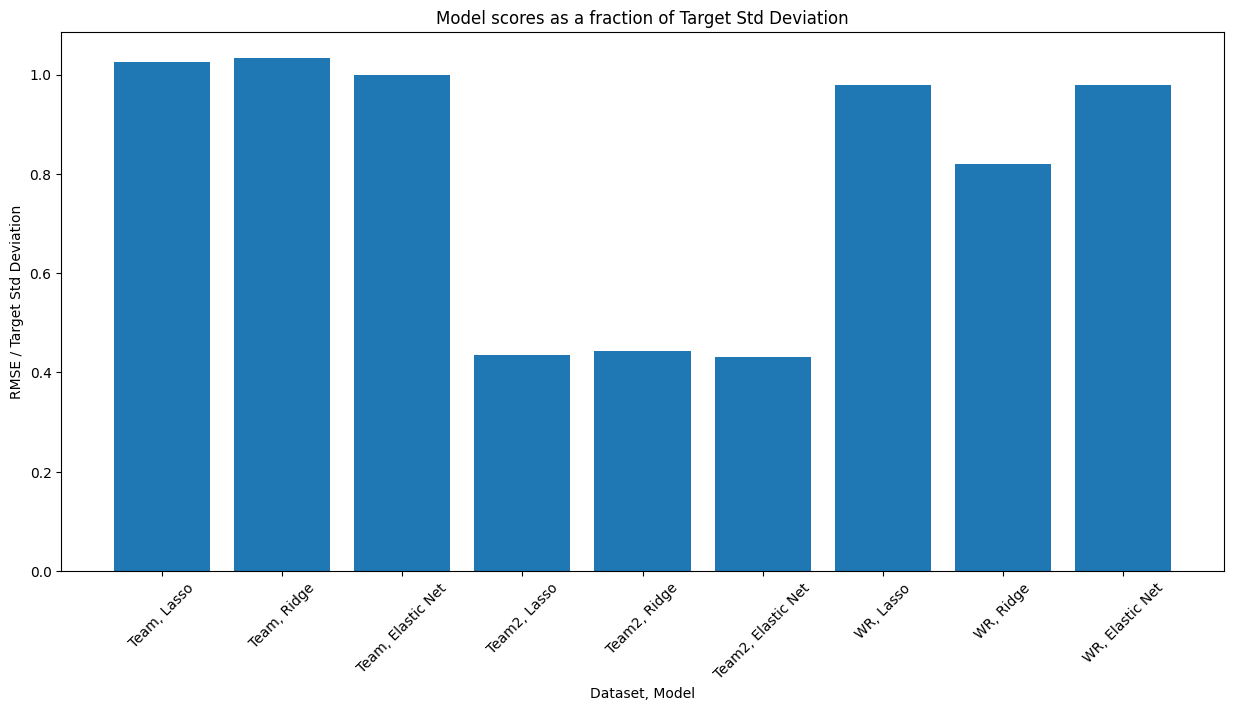

In [15]:
scores = (
    [score / y_team.std() for score in scores_team] +
    [score / y_team2.std() for score in scores_team2] +
    [score / y_wr.std() for score in scores_wr]
)
labels = ['Team, Lasso', 'Team, Ridge', 'Team, Elastic Net', 'Team2, Lasso', 'Team2, Ridge', 'Team2, Elastic Net', 'WR, Lasso', 'WR, Ridge', 'WR, Elastic Net']

plt.figure(figsize=(15, 7))
plt.bar(labels, scores)
plt.xticks(rotation=45)
plt.title('Model scores as a fraction of Target Std Deviation')
plt.ylabel('RMSE / Target Std Deviation')
plt.xlabel('Dataset, Model')
plt.show()

### Optimizing Alpha for best models

In [16]:
# Team stats to predict inj w enet
alpha_team = {'alpha': [1, 5, 10, 20, 40, 60, 80, 100]}
enet_team_grid = ElasticNet()
gridsearch_team = GridSearchCV(estimator=enet_team_grid, param_grid=alpha_team, cv=rkf, scoring='neg_mean_squared_error')
gridsearch_team.fit(X_team, y_team)

results_team = pd.DataFrame(gridsearch_team.cv_results_)
results_team['mean_error'] = np.sqrt(-results_team['mean_test_score'])
results_team[['param_alpha', 'mean_error']]

c:\Users\mgurg\Desktop\BU OMCDS\Semester-3\datascience\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.235e+03, tolerance: 1.017e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\mgurg\Desktop\BU OMCDS\Semester-3\datascience\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.545e+03, tolerance: 9.992e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\mgurg\Desktop\BU OMCDS\Semester-3\datascience\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

,param_alpha,mean_error
0,1,19.307286
1,5,19.143445
2,10,19.049019
3,20,18.958780
4,40,18.865464
5,60,18.803088
6,80,18.745227
7,100,18.708476


In [17]:
# Team stats to predict win_loss_perc w enet

alpha_team2 = {'alpha': [.1, .25, .3, .4, .5, .75]}
enet_team2_grid = ElasticNet()
gridsearch_team2 = GridSearchCV(estimator=enet_team2_grid, param_grid=alpha_team2, cv=rkf, scoring='neg_mean_squared_error')
gridsearch_team2.fit(X_team2, y_team2)

results_team2 = pd.DataFrame(gridsearch_team2.cv_results_)
results_team2['mean_error'] = np.sqrt(-results_team2['mean_test_score'])
results_team2[['param_alpha', 'mean_error']]

c:\Users\mgurg\Desktop\BU OMCDS\Semester-3\datascience\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.701e-04, tolerance: 9.320e-04
  model = cd_fast.enet_coordinate_descent(
c:\Users\mgurg\Desktop\BU OMCDS\Semester-3\datascience\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.625e-03, tolerance: 9.868e-04
  model = cd_fast.enet_coordinate_descent(
c:\Users\mgurg\Desktop\BU OMCDS\Semester-3\datascience\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

,param_alpha,mean_error
0,0.10,0.081468
1,0.25,0.081180
2,0.30,0.081255
3,0.40,0.081459
4,0.50,0.081600
5,0.75,0.081587


In [18]:
# wr play by play to predict injury duration with ridge

alpha_wr = {'alpha': [1, 1.25, 1.5, 1.75, 2, 2.5]}
ridge_wr_grid = Ridge()
gridsearch_wr = GridSearchCV(estimator=ridge_wr_grid, param_grid=alpha_wr, cv=rkf, scoring='neg_mean_squared_error')
gridsearch_wr.fit(X_wr, y_wr)

results_wr = pd.DataFrame(gridsearch_wr.cv_results_)
results_wr['mean_error'] = np.sqrt(-results_wr['mean_test_score'])
results_wr[['param_alpha', 'mean_error']]

,param_alpha,mean_error
0,1.00,3.934330
1,1.25,3.934321
2,1.50,3.934316
3,1.75,3.934314
4,2.00,3.934316
5,2.50,3.934329


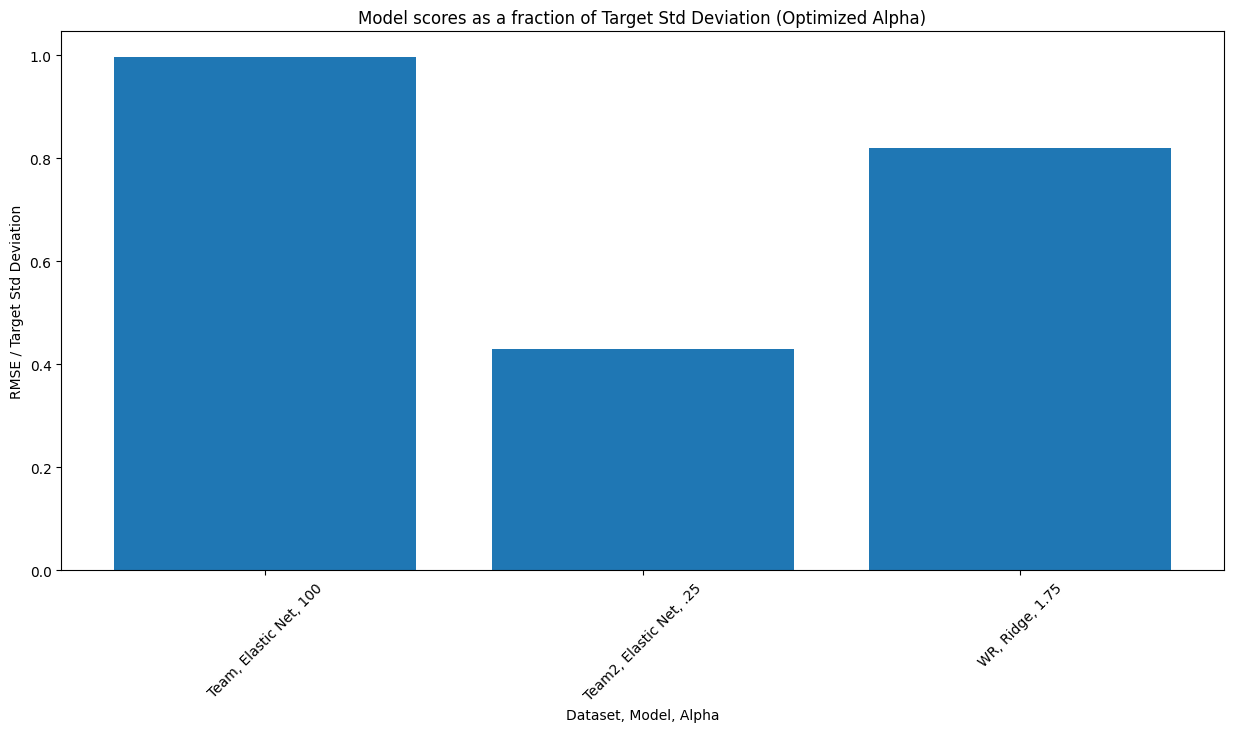

In [19]:
grid_scores = [18.708476/y_team.std(), 0.081180/y_team2.std(), 3.934314/y_wr.std()]
grid_labels = ['Team, Elastic Net, 100', 'Team2, Elastic Net, .25', 'WR, Ridge, 1.75']

plt.figure(figsize=(15, 7))
plt.bar(grid_labels, grid_scores)
plt.xticks(rotation=45)
plt.title('Model scores as a fraction of Target Std Deviation (Optimized Alpha)')
plt.ylabel('RMSE / Target Std Deviation')
plt.xlabel('Dataset, Model, Alpha')
plt.show()